<a href="https://colab.research.google.com/github/dinesh-saka/Predict-Taxi-Trip-Duration/blob/main/PredictTaxiTripDuration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

In [ ]:
urls = {
    "train" : "1__eB5gUp7Ap3CHPzsn75kYRgAHmf8XqY" ,
    "test" : "1GcrhqniKObyqeTJMxKabld0CSGmZ2o92"
}
for name, id in urls.items():
    url = f"https://drive.google.com/uc?id={id}"
    output = f"/content/{name}"
    gdown.download(url, output, quiet=False)
    print(f"Loaded {name}")

Downloading...
From: https://drive.google.com/uc?id=1__eB5gUp7Ap3CHPzsn75kYRgAHmf8XqY
To: /content/train
100%|██████████| 201M/201M [00:01<00:00, 120MB/s]


Loaded train


Downloading...
From: https://drive.google.com/uc?id=1GcrhqniKObyqeTJMxKabld0CSGmZ2o92
To: /content/test
100%|██████████| 70.8M/70.8M [00:00<00:00, 106MB/s] 


Loaded test


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Data Exploration

In [ ]:
df = pd.read_csv("train")
test = pd.read_csv("test")

In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [ ]:
test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N


In [ ]:
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  


#Identifying outliers

In [ ]:
#Count the number of duplicated rows
df.duplicated().sum()

0

In [ ]:
#Count the number of NaN values for each column
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

This shows that there are no duplicate or missing values

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


We can see that trip_duration takes strange values for min and max. Let's have a quick visualization with a boxplot.



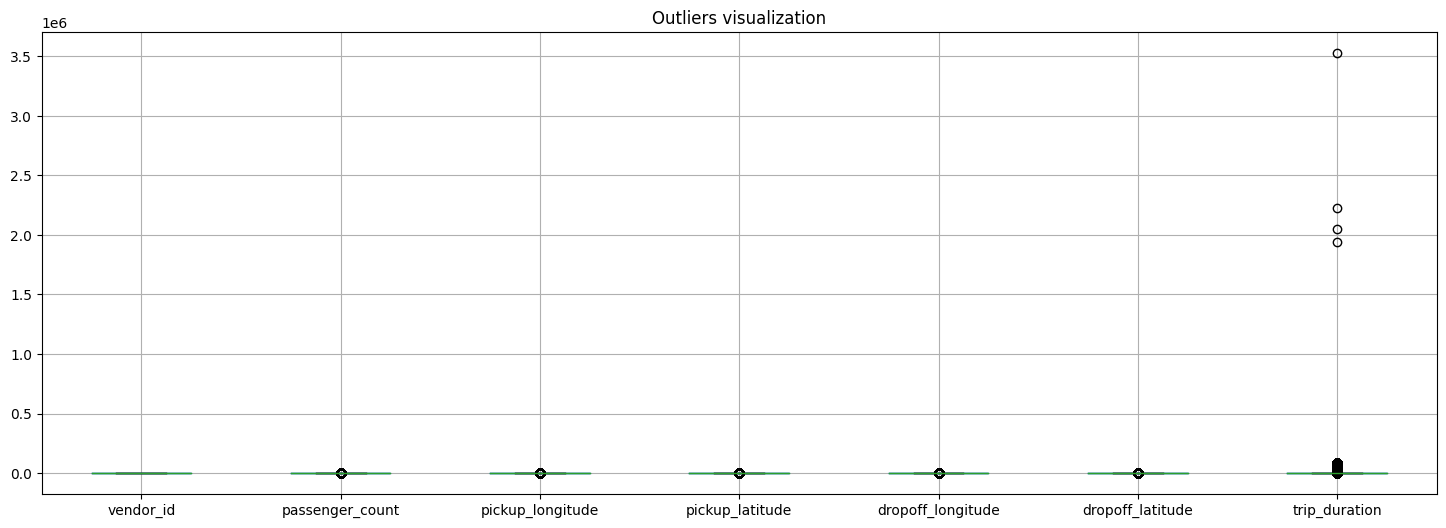

In [ ]:
#Visualize univariate outliers
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot();

There are outliers for trip_duration. Its harder to find a proper interpretation and it will probably damage our model, so I choose to get rid of them.

##Data Preprocessing

In [ ]:
#Only keep trips that lasted less than 5900 seconds
df = df[(df.trip_duration < 5900)]

In [ ]:
#Only keep trips with passengers
df = df[(df.passenger_count > 0)]

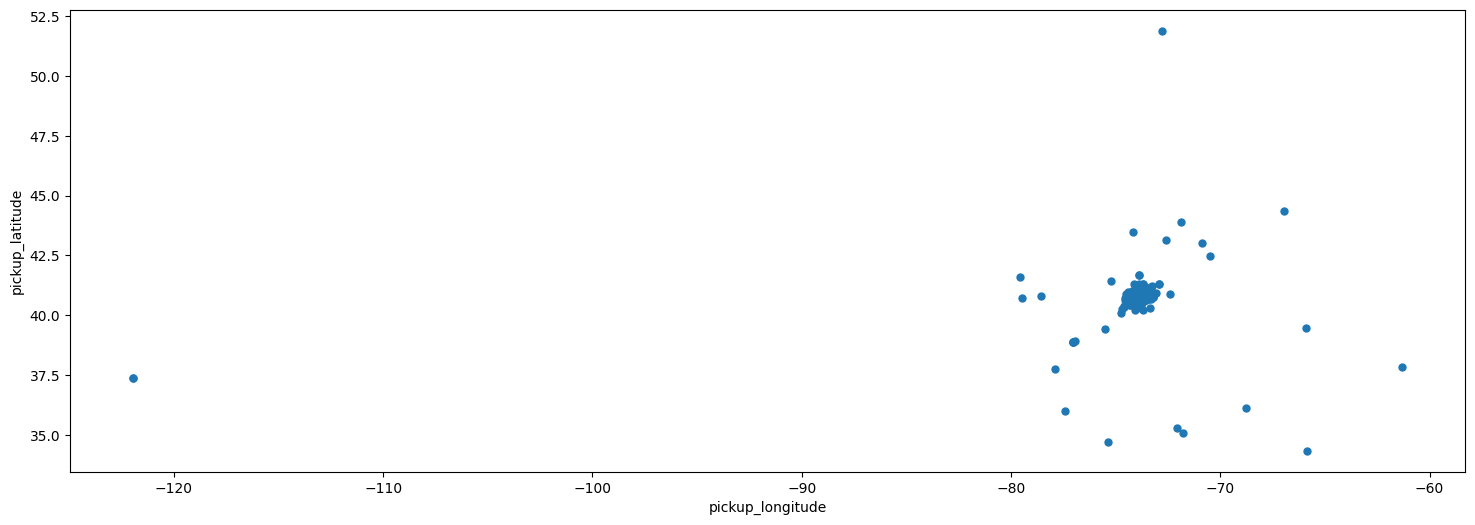

In [ ]:
#Plot pickup positions to visualize outliers
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

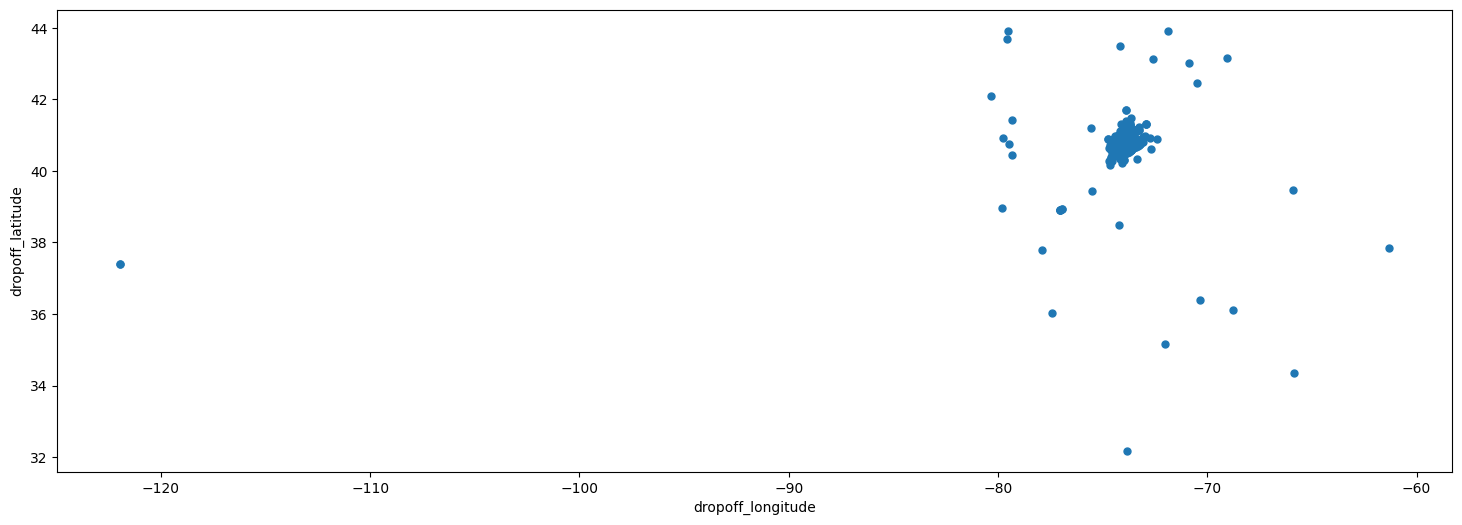

In [ ]:
#Plot dropoff positions to visualize outliers
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [ ]:
#Remove position outliers
df = df[(df.pickup_longitude > -100)]
df = df[(df.pickup_latitude < 50)]

##Data Visualization

a. Target

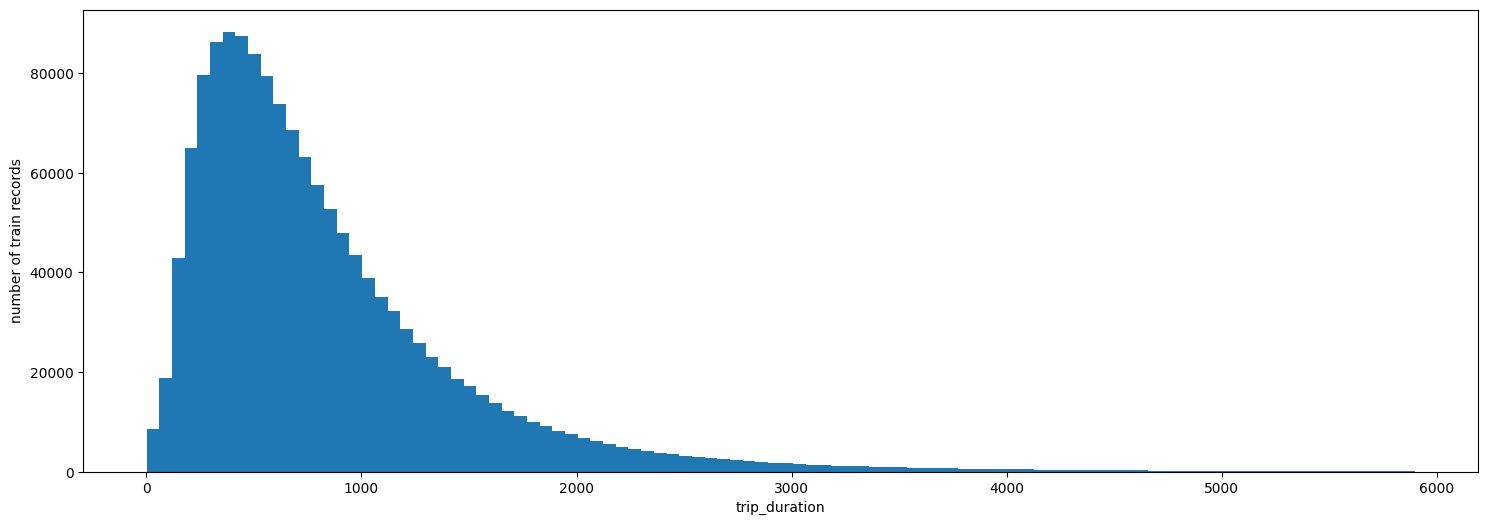

In [ ]:
#Visualize the distribution of trip_duration values
plt.subplots(figsize=(18,6))
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

The distribution is right-skewed so we can consider a log-transformation of trip_duration column.

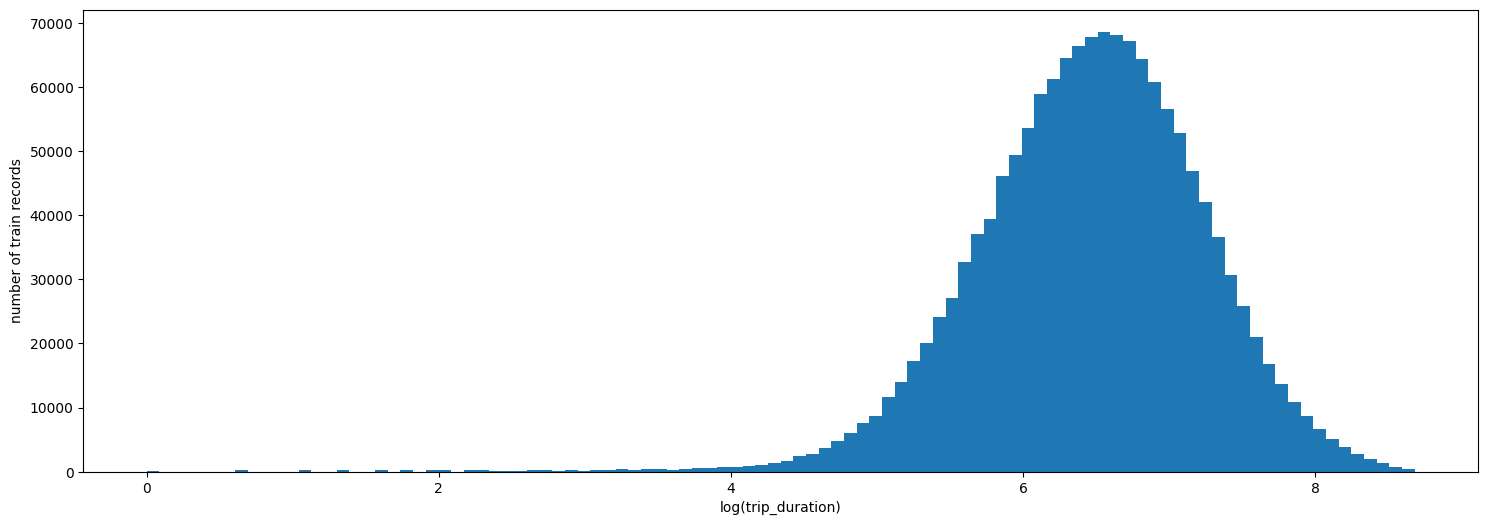

In [ ]:
#Log-transformation
plt.subplots(figsize=(18,6))
df['trip_duration'] = np.log(df['trip_duration'].values)
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

b. Deal with categorical features


In [ ]:
#One-hot encoding binary categorical features
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

df.drop(['vendor_id'], axis=1, inplace=True)

c. Deal with dates

In [ ]:
#Datetyping the dates
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

df.drop(['dropoff_datetime'], axis=1, inplace=True) #as we don't have this feature in the testset

#Date features creations and deletions
df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.week
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['minute_oftheday'] = df['hour'] * 60 + df['minute']
df.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

df.drop(['pickup_datetime'], axis=1, inplace=True)

df.info()

<ipython-input-20-6e28e7649a19>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.pickup_datetime.dt.week
<ipython-input-20-6e28e7649a19>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week'] = test.pickup_datetime.dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455954 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1455954 non-null  object 
 1   passenger_count    1455954 non-null  int64  
 2   pickup_longitude   1455954 non-null  float64
 3   pickup_latitude    1455954 non-null  float64
 4   dropoff_longitude  1455954 non-null  float64
 5   dropoff_latitude   1455954 non-null  float64
 6   trip_duration      1455954 non-null  float64
 7   N                  1455954 non-null  uint8  
 8   Y                  1455954 non-null  uint8  
 9   1                  1455954 non-null  uint8  
 10  2                  1455954 non-null  uint8  
 11  month              1455954 non-null  int64  
 12  week               1455954 non-null  int64  
 13  weekday            1455954 non-null  int64  
 14  hour               1455954 non-null  int64  
 15  minute_oftheday    1455954 non-n

d. Distance and speed creations

In [ ]:
#Function aiming at calculating distances from coordinates
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
df['distance'] = ft_haversine_distance(df['pickup_latitude'].values,
                                                 df['pickup_longitude'].values,
                                                 df['dropoff_latitude'].values,
                                                 df['dropoff_longitude'].values)
test['distance'] = ft_haversine_distance(test['pickup_latitude'].values,
                                                test['pickup_longitude'].values,
                                                test['dropoff_latitude'].values,
                                                test['dropoff_longitude'].values)

In [ ]:
#Function aiming at calculating the direction
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

#Add direction feature
df['direction'] = ft_degree(df['pickup_latitude'].values,
                                df['pickup_longitude'].values,
                                df['dropoff_latitude'].values,
                                df['dropoff_longitude'].values)
test['direction'] = ft_degree(test['pickup_latitude'].values,
                                  test['pickup_longitude'].values,
                                  test['dropoff_latitude'].values,
                                  test['dropoff_longitude'].values)

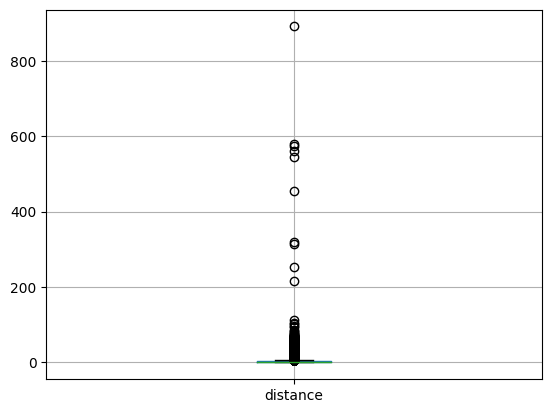

In [ ]:
#Visualize distance outliers
df.boxplot(column='distance', return_type='axes');

In [ ]:
#Remove distance outliers
df = df[(df.distance < 200)]

In [ ]:
#Create speed feature
df['speed'] = df.distance / df.trip_duration

<ipython-input-25-3034a81c8aa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed'] = df.distance / df.trip_duration


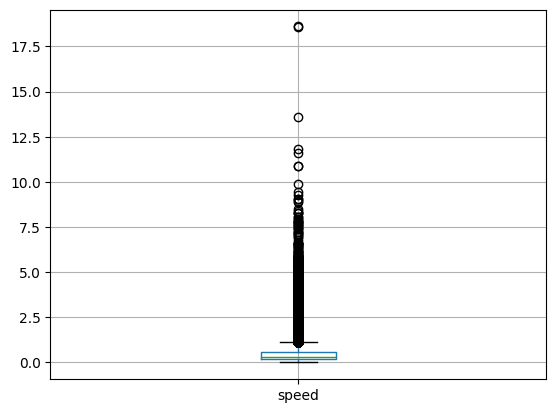

In [ ]:
#Visualize speed feature
df.boxplot(column='speed', return_type='axes');

In [ ]:
#Remove speed outliers
df = df[(df.speed < 30)]
df.drop(['speed'], axis=1, inplace=True)

<ipython-input-27-18c1b35628c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['speed'], axis=1, inplace=True)


e. Correlations and dimensionality reductions

<ipython-input-28-01639eed1974>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');


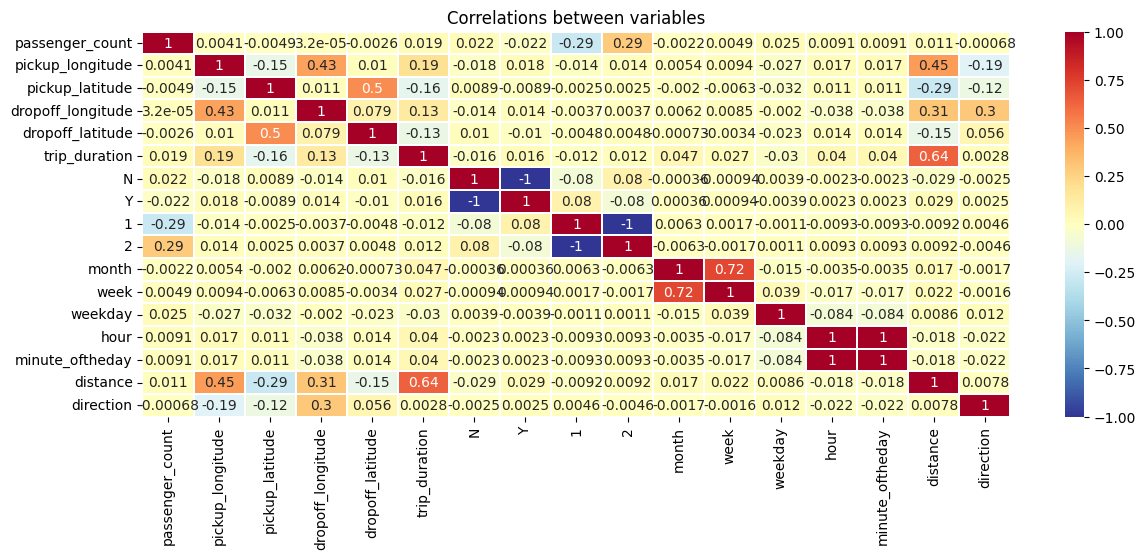

In [ ]:
#Correlations between variables
fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

## Data Modelling

a. Split

In [ ]:
#Split the labeled data frame into two sets: features and target
y = df["trip_duration"]
df.drop(["trip_duration"], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
X = df

X.shape, y.shape

((1455912, 16), (1455912,))

In [ ]:
#Split the labeled data frame into two sets to train then test the models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1164729, 16), (1164729,), (291183, 16), (291183,))

b. Metrics

For this specific problematic, we'll measure the error using the RMSE (Root Mean Squared Error).

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

c. Models

In [ ]:
import lightgbm as lgb
lgb_params = {
    'metric': 'rmse',
    'is_training_metric': True
}
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=5)



/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 1164729, number of used features: 16
[LightGBM] [Info] Start training from score 6.456576
[1]	training's rmse: 0.725743	valid_1's rmse: 0.725433
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 0.681407	valid_1's rmse: 0.681104
[3]	training's rmse: 0.643071	valid_1's rmse: 0.642816
[4]	training's rmse: 0.609811	valid_1's rmse: 0.609565
[5]	training's rmse: 0.581306	valid_1's rmse: 0.581134
[6]	training's rmse: 0.556536	valid_1's rmse: 0.556457
[7]	training's rmse: 0.535704	valid_1's rmse: 0.535674
[8]	training's rmse: 0.517254	valid_1's rmse: 0.517259
[9]	training's rmse: 0.501485	valid_1's rmse: 0.501592
[10]	training's rmse: 0.488285	val

We find that rmse = 0.3622

In [ ]:
%%time
from lightgbm import LGBMRegressor

lgbm = lgb.LGBMRegressor()
lgbm.fit(X, y)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test))
print(np.sqrt(MSE(y_test, lgbm.predict(X_test))))

0.7819375202552783 0.7807210981828703
0.3636041711454124
CPU times: user 57.2 s, sys: 378 ms, total: 57.6 s
Wall time: 34.9 s


LightGBM is Fast

d. Cross-validation

In [ ]:
lgb_df = lgb.Dataset(X, y)
lgb.cv(lgb_params, lgb_df, stratified=False) #False is needed as it only works with classification

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lgbm, X, y, cv=5)
print(cv_score)
print(np.mean(cv_score))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 1164728, number of used features: 16
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 1164728, number of used features: 16
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.317913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Num

Therefore , our LightGBM model is stable

In [ ]:
lgb_params = {
    #'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000,
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 }

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=1500, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=5)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7001
[LightGBM] [Info] Number of data points in the train set: 1164729, number of used features: 16
[LightGBM] [Info] Start training from score 6.456576
[1]	training's l2: 0.517437	valid_1's l2: 0.517754
Training until validation scores don't improve for 5 rounds
[2]	training's l2: 0.456051	valid_1's l2: 0.45725
[3]	training's l2: 0.397133	valid_1's l2: 0.399047
[4]	training's l2: 0.348851	valid_1's l2: 0.351388
[5]	training's l2: 0.31533	valid_1's l2: 0.318449
[6]	training's l2: 0.281867	valid_1's l2: 0.285581
[7]	training's l2: 0.25429	valid_1's l2: 0.258694
[8]	training's l2: 0.235388	valid_1's l2: 0.24025
[9]	training's l2: 0.219513	valid_1's l2: 0.224856
[10]	training's l2: 0.202748	valid_1's l2: 0.208721
[11]	training's l2: 0.188889	valid_1's l2: 0.195425
[12]	training's l2: 0.177397	valid

##Training and predictions

In [ ]:
%%time
#Training on all labeled data using the best parameters
lgb_df = lgb.Dataset(X, y)
lgb_model = lgb.train(lgb_params, lgb_df, num_boost_round=1500)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.395991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7001
[LightGBM] [Info] Number of data points in the train set: 1455912, number of used features: 16
[LightGBM] [Info] Start training from score 6.456971
CPU times: user 11min 2s, sys: 4.98 s, total: 11min 7s
Wall time: 6min 30s


In [ ]:
test_columns = X.columns
predictions = lgb_model.predict(test[test_columns])
output = pd.DataFrame({'id': test.id, 'trip_duration': np.exp(predictions)})
output.head()

,id,trip_duration
0,id3004672,743.576295
1,id3505355,628.495108
2,id1217141,452.662461
3,id2150126,936.227059
4,id1598245,415.412181


##Conclusion

In conclusion, adopting the LightGBM model proves highly effective in predicting NYC taxi trip durations. Leveraging gradient boosting and handling non-linearity, LightGBM excels in capturing trip dynamics. Through rigorous evaluation with RMSE.

We validate its predictive capabilities and gain valuable insights into travel factors, aiding transportation planning and route optimization. Versatile and interpretable, LightGBM is a valuable tool for forecasting taxi trip durations, enhancing urban mobility, and elevating customer satisfaction.